# Classifying Wines with Support Vector Machines (SVM)

The objective of this exercise is to build and evaluate a Support Vector Machine (SVM) model for classifying wines based on their chemical properties using the Wine dataset available in scikit-learn. You will explore various aspects of SVM model training and optimization, including preprocessing steps, hyperparameter tuning, and kernel selection.







# Loading the Dataset

Load the Wine dataset using load_wine from sklearn.datasets.
Inspect the dataset to understand its structure and features.

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine= sklearn.datasets.load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Data Preprocessing

- Split the dataset into features and target labels.
- Split the data into training and testing sets using train_test_split from sklearn.model_selection.

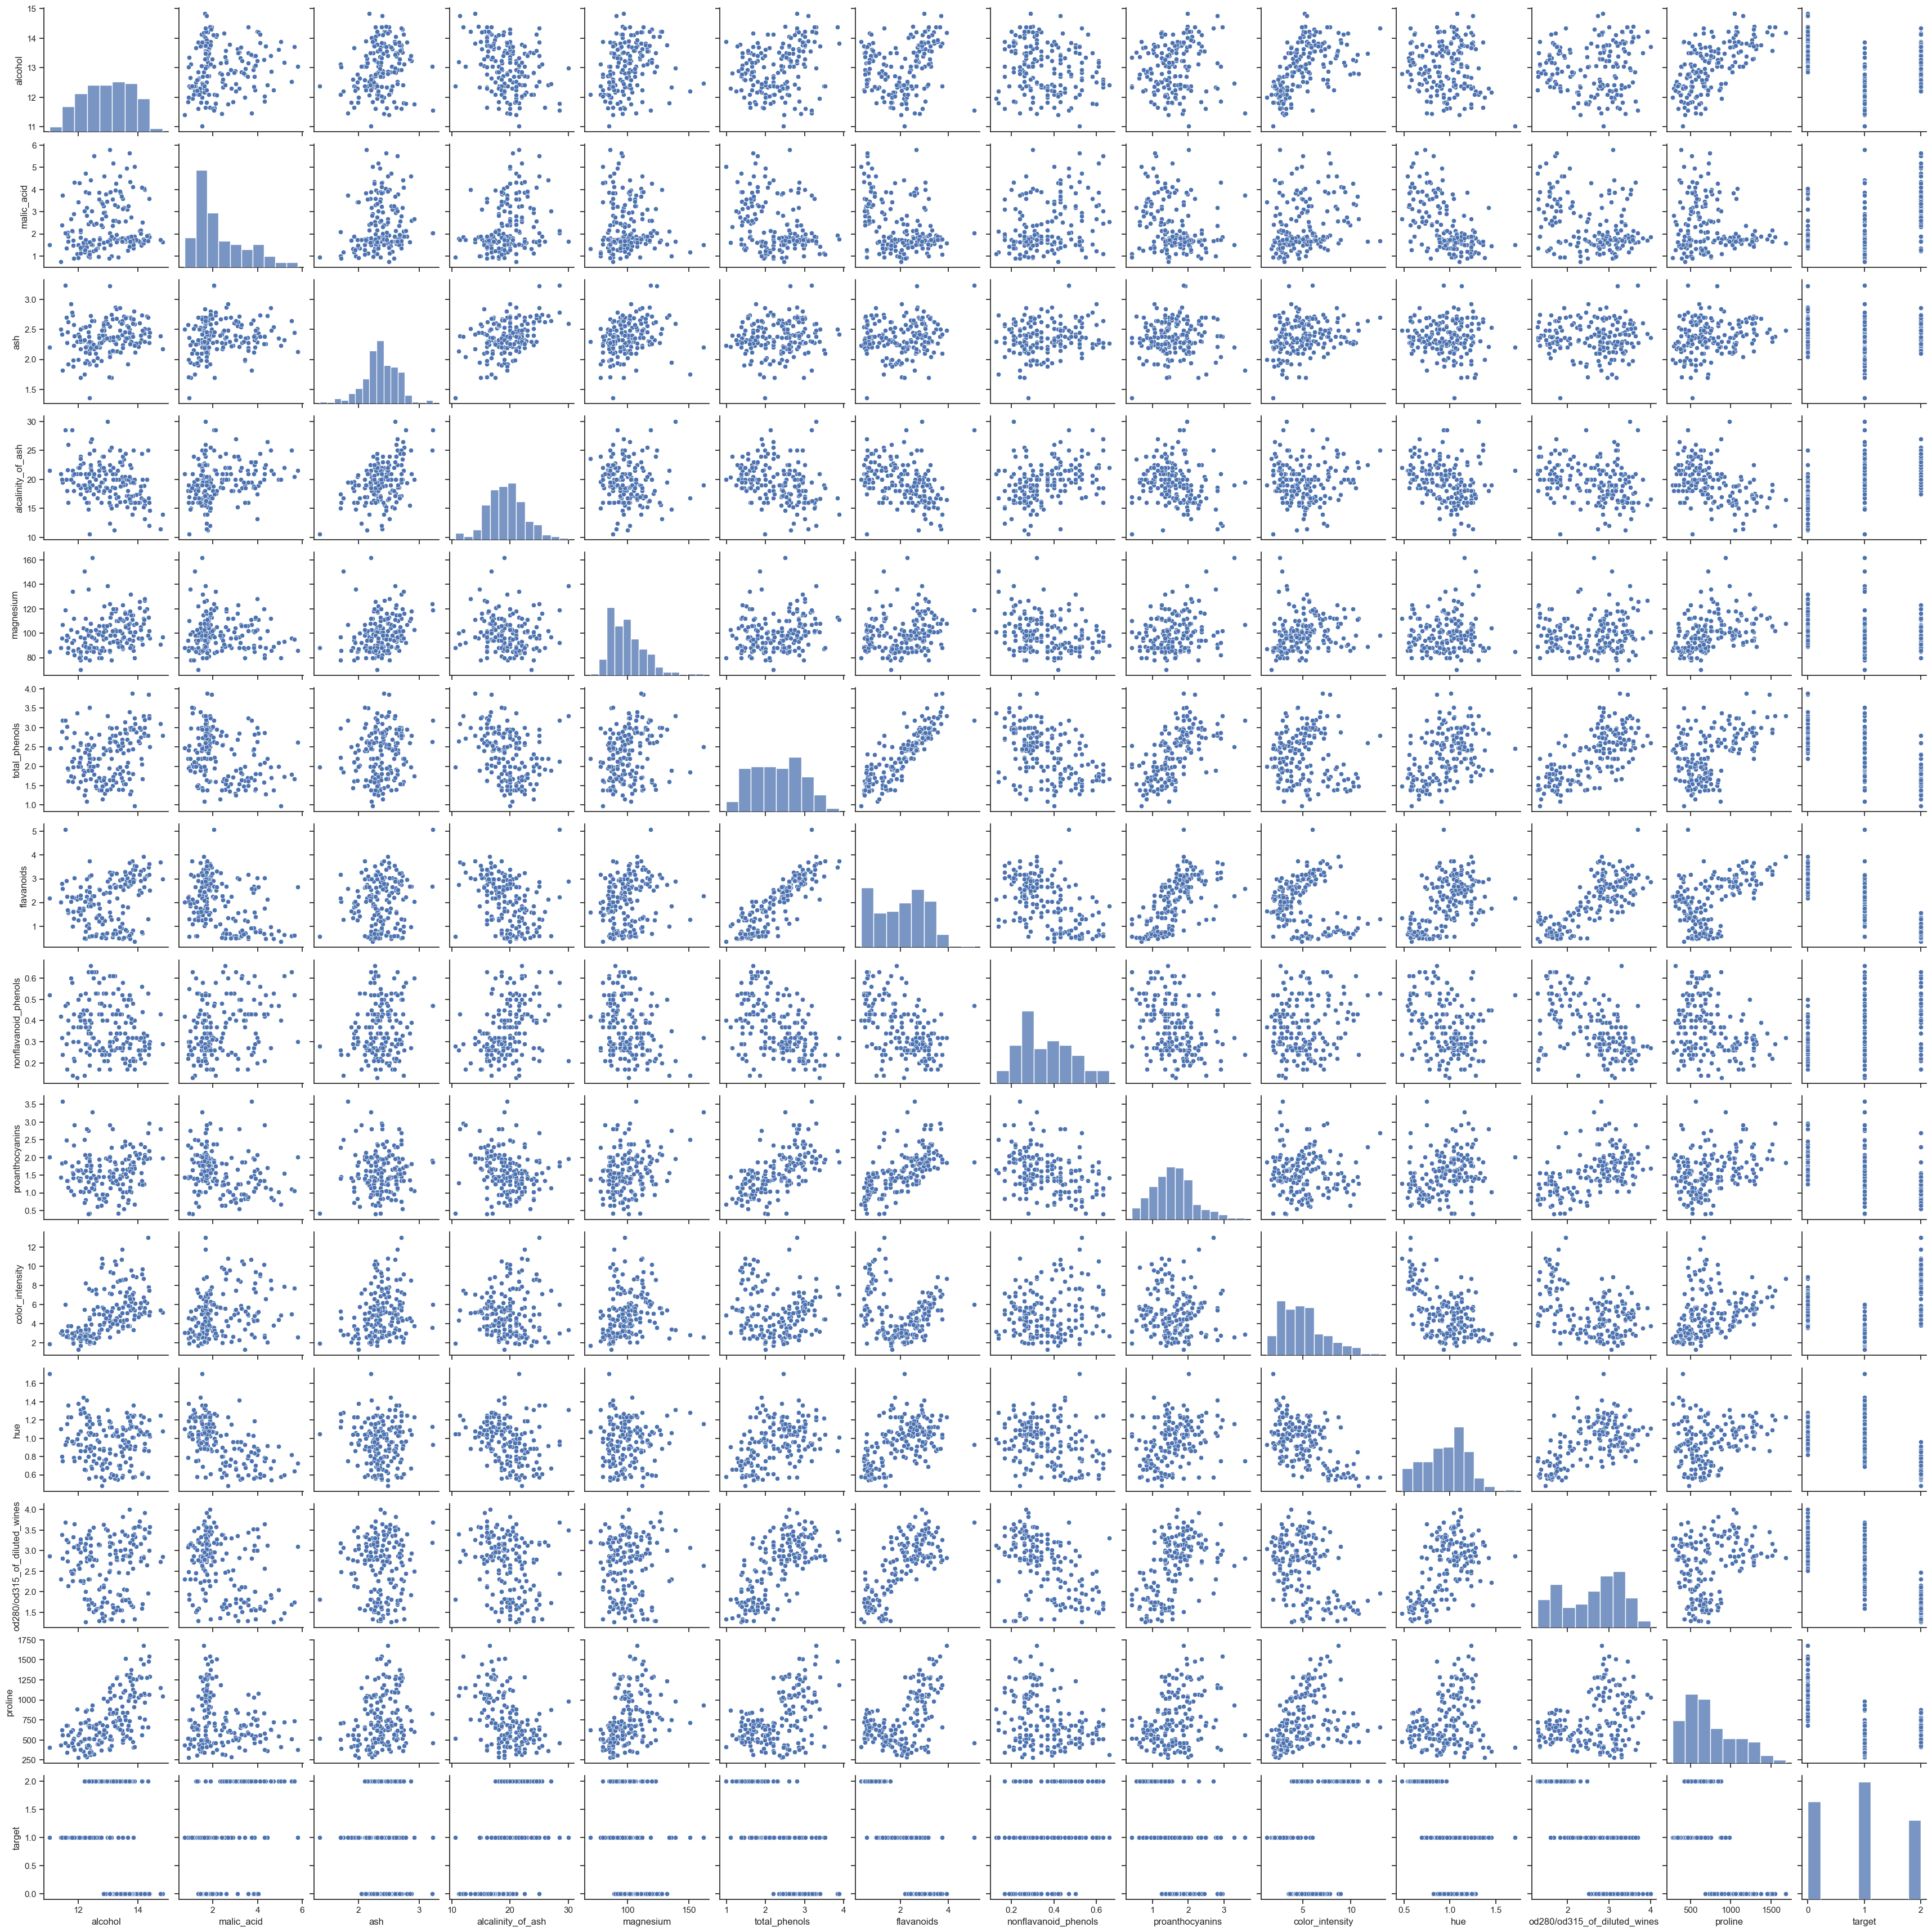

In [3]:
import seaborn as sns
sns.set_theme(style='ticks')
sns.pairplot(data);

In [4]:
from sklearn.model_selection import train_test_split
feats = data.drop(['target'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(feats, data['target'], test_size=.2, random_state=42)


# Baseline Model

Train a baseline SVM model using default hyperparameters.
Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and F1-score. Experiment with different kernel functions (e.g., linear, polynomial, RBF) and observe their effects on model performance.

In [5]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [6]:
for Kernel in ['linear', 'rbf', 'poly']:
    print(f'\nusing {Kernel} kernel')
    # fitting process with SVM, no standardizing
    SVM = make_pipeline(SVC(kernel=Kernel))
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    print(f' prediction = {y_pred}')
    print(f' y_test     = {y_test.to_numpy()}')
    print(f' f1 score   = {f1_score(y_test, y_pred, average="macro")} ')
    print(f' accuracy   = {accuracy_score(y_test, y_pred)} ')
    print(f' precision  = {precision_score(y_test, y_pred, average="macro")} ')
    print(f' recall     = {recall_score(y_test, y_pred , average="macro")} ')


using linear kernel
 prediction = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 1.0 
 accuracy   = 1.0 
 precision  = 1.0 
 recall     = 1.0 

using rbf kernel
 prediction = [0 0 1 0 1 0 1 2 2 2 0 1 0 1 0 1 1 1 0 1 0 1 2 2 1 1 1 2 1 0 0 1 2 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 0.7639846743295019 
 accuracy   = 0.8055555555555556 
 precision  = 0.7682539682539682 
 recall     = 0.7619047619047619 

using poly kernel
 prediction = [0 0 1 0 1 0 1 2 1 2 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 0.7380006966213863 
 accuracy   = 0.8333333333333334 
 precision  = 0.8900584795321637 
 recall     = 0.75 


# Data Normalization

Standardize the features using StandardScaler from sklearn.preprocessing.
Explore the effects of data normalization on model performance with different normalization techniques.

In [7]:
# this time i will standardize first
for Kernel in ['linear', 'rbf', 'poly']:
    print(f'\nusing {Kernel} kernel')
    # fitting process with SVM
    SVM = make_pipeline(StandardScaler(), SVC(kernel=Kernel))
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    print(f' prediction = {y_pred}')
    print(f' y_test     = {y_test.to_numpy()}')
    print(f' f1 score   = {f1_score(y_test, y_pred, average="macro")} ')
    print(f' accuracy   = {accuracy_score(y_test, y_pred)} ')
    print(f' precision  = {precision_score(y_test, y_pred, average="macro")} ')
    print(f' recall     = {recall_score(y_test, y_pred , average="macro")} ')



using linear kernel
 prediction = [0 0 2 0 1 0 1 2 1 2 0 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 0.9680464778503994 
 accuracy   = 0.9722222222222222 
 precision  = 0.9629629629629629 
 recall     = 0.9761904761904763 

using rbf kernel
 prediction = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 1.0 
 accuracy   = 1.0 
 precision  = 1.0 
 recall     = 1.0 

using poly kernel
 prediction = [0 0 2 0 1 0 1 2 1 2 0 2 1 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 0.9761600681140911 
 accuracy   = 0.9722222222222222 
 precision  = 0.9777777777777779 
 recall     = 0.9761904761904763 


this helped the RBF kernel and poly kernel and slightly compromised the linear

In [8]:
from sklearn.preprocessing import RobustScaler

for Kernel in ['linear', 'rbf', 'poly']:
    print(f'\nusing {Kernel} kernel')
    # fitting process with SVM
    SVM = make_pipeline(RobustScaler(), SVC(kernel=Kernel), )
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    print(f' prediction = {y_pred}')
    print(f' y_test     = {y_test.to_numpy()}')
    print(f' f1 score   = {f1_score(y_test, y_pred, average="macro")} ')
    print(f' accuracy   = {accuracy_score(y_test, y_pred)} ')
    print(f' precision  = {precision_score(y_test, y_pred, average="macro")} ')
    print(f' recall     = {recall_score(y_test, y_pred , average="macro")} ')



using linear kernel
 prediction = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 1.0 
 accuracy   = 1.0 
 precision  = 1.0 
 recall     = 1.0 

using rbf kernel
 prediction = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 1.0 
 accuracy   = 1.0 
 precision  = 1.0 
 recall     = 1.0 

using poly kernel
 prediction = [0 0 2 0 1 0 1 2 1 2 1 2 1 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 y_test     = [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
 f1 score   = 0.9521367521367522 
 accuracy   = 0.9444444444444444 
 precision  = 0.9583333333333334 
 recall     = 0.9523809523809524 


# Hyperparameter Tuning

Perform hyperparameter tuning to find the best combination of hyperparameters for the SVM model.
Tune hyperparameters such as C (regularization parameter) and the choice of kernel (linear, polynomial, RBF).
Use techniques like GridSearchCV or RandomizedSearchCV from sklearn.model_selection to efficiently search through the hyperparameter space.

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
params = { 'C': [0.1, 1, 10, 100],
   'gamma': np.linspace(0.01, 0.2, 10),
   'kernel': ['rbf','linear','poly','sigmoid']  }
scoring = 'f1_micro'

model = GridSearchCV(SVC(), param_grid=params, cv=5, scoring=scoring)
model.fit(x_train_scaled, y_train)

parameters = model.best_params_
print(parameters)

{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [12]:
y_pred = model.predict(x_test_scaled)

print(f' f1 score   = {f1_score(y_test, y_pred, average="macro")} ')
print(f' accuracy   = {accuracy_score(y_test, y_pred)} ')
print(f' precision  = {precision_score(y_test, y_pred, average="macro")} ')
print(f' recall     = {recall_score(y_test, y_pred , average="macro")} ')

 f1 score   = 1.0 
 accuracy   = 1.0 
 precision  = 1.0 
 recall     = 1.0 


# Effects of Data Size

Explore the effects of varying the size of the training data on model performance.
Train SVM models using different proportions of the training data (change the number of CV folds) and observe how performance changes. Visualize the relationship between training size and model performance.

In [13]:
from sklearn.metrics import classification_report

In [14]:
def SVM_model(testsize:float):
    """testsize = % of data to test on"""

    # split and standardize
    x_train, x_test, y_train, y_test = train_test_split(feats, data['target'], test_size=testsize, random_state=42)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # hyperparameter tuning
    params = { 'C': [0.1, 1, 10, 100],
    'gamma': np.linspace(0.01, 0.2, 10),
    'kernel': ['rbf','linear','poly','sigmoid']  }
    scoring = 'f1_micro'
    model = GridSearchCV(SVC(), param_grid=params, cv=5, scoring=scoring)
    model.fit(x_train_scaled, y_train)

    # results
    parameters = model.best_params_
    print(parameters)
    y_pred = model.predict(x_test_scaled)
    
    f1_sc = f1_score(y_test, y_pred, average="macro")
    return f1_sc

{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 1, 'gamma': 0.07333333333333333, 'kernel': 'sigmoid'}
{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'C': 1, 'gamma': 0.052222222222222225, 'kernel': 'sigmoid'}


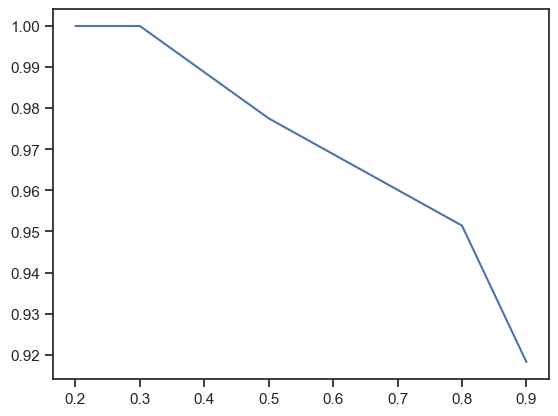

In [15]:
sizes = [.2, .3, .5, .8, .9]; scores = []
for testsize in sizes:
    f1 = SVM_model(testsize)
    scores.append(f1)

plt.plot(sizes, scores)
plt.show()

# Model Evaluation

Evaluate the final tuned SVM model on the testing set using various performance metrics.
Plot confusion matrices to visualize the model's predictions.
Discuss the results and insights gained from the experimentation.

final model ---


In [16]:
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(feats, data['target'], test_size=.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# hyperparameter tuning
params = { 'C': [0.1, 1, 10, 100],
    'gamma': np.linspace(0.01, 0.2, 10),
    'kernel': ['rbf','linear','poly','sigmoid']  }
scoring = 'f1_micro'

model = GridSearchCV(SVC(), param_grid=params, cv=5, scoring='f1_micro') # <-- our final model
model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='f1_micro')

our final model is the SVM with parameters:

In [17]:
parameters = model.best_params_
print(parameters)

{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [18]:
y_pred = model.predict(x_test_scaled)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [19]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
import itertools

In [21]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

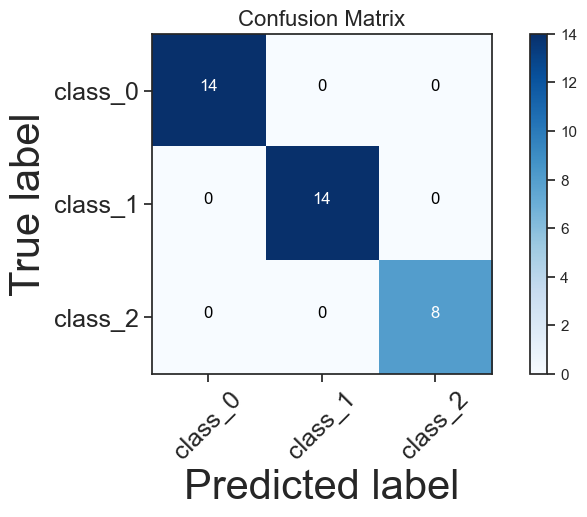

In [25]:
class_names = wine.target_names

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In summary, each kernel seems to be affected differently by different ways of standardizing the data.
Hyperparameter tuning is essential in finding the optimal model for our data, as is having lots of training data. It appears that less training data reduces performance.